# Linear Regression Analysis on Advertising Dataset

This notebook demonstrates a complete linear regression workflow using scikit-learn:
- **Data Preparation**: Load and explore the advertising dataset
- **Train-Test Split**: Divide data into 80% training and 20% testing sets
- **Model Training**: Train a linear regression model using Ordinary Least Squares
- **Evaluation**: Assess performance using MSE and R² metrics
- **Interpretation**: Analyze feature coefficients and their impact on sales

## Dataset Overview
The advertising dataset contains advertising spending (TV, Radio, Newspaper) in thousands of dollars and the resulting sales in thousands of units.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Data Preparation

Load the advertising dataset and identify features and target variable. We'll examine the data structure and basic statistics.

In [2]:
# Load the advertising dataset
df = pd.read_csv('advertising.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}, Number of features: {df.shape[1] - 1}")

# Display basic statistics
print("\nBasic statistics:")
print(df.describe())

First few rows of the dataset:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset shape: (200, 4)
Number of samples: 200, Number of features: 3

Basic statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [3]:
# Identify features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable

print("Features (X):")
print(X.head())
print(f"\nTarget (y):")
print(y.head())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features (X):
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Target (y):
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

Features shape: (200, 3)
Target shape: (200,)


## Step 2: Train-Test Split

Split the data into training (80%) and testing (20%) sets. We use a fixed random state for reproducibility.

In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training set size: 160 samples (80.0%)
Testing set size: 40 samples (20.0%)

Training features shape: (160, 3)
Testing features shape: (40, 3)
Training target shape: (160,)
Testing target shape: (40,)


## Step 3: Model Training

Train a Linear Regression model using the training data. The `.fit()` method uses Ordinary Least Squares (OLS) to calculate optimal coefficients.

In [5]:
# Instantiate and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


## Step 4: Model Evaluation

Generate predictions on the test set and evaluate the model using Mean Squared Error (MSE) and R² score.

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"\nInterpretation: The model explains {r2*100:.2f}% of the variance in Sales.")

Model Evaluation Metrics:
Mean Squared Error (MSE): 2.9078
Root Mean Squared Error (RMSE): 1.7052
R² Score: 0.9059

Interpretation: The model explains 90.59% of the variance in Sales.


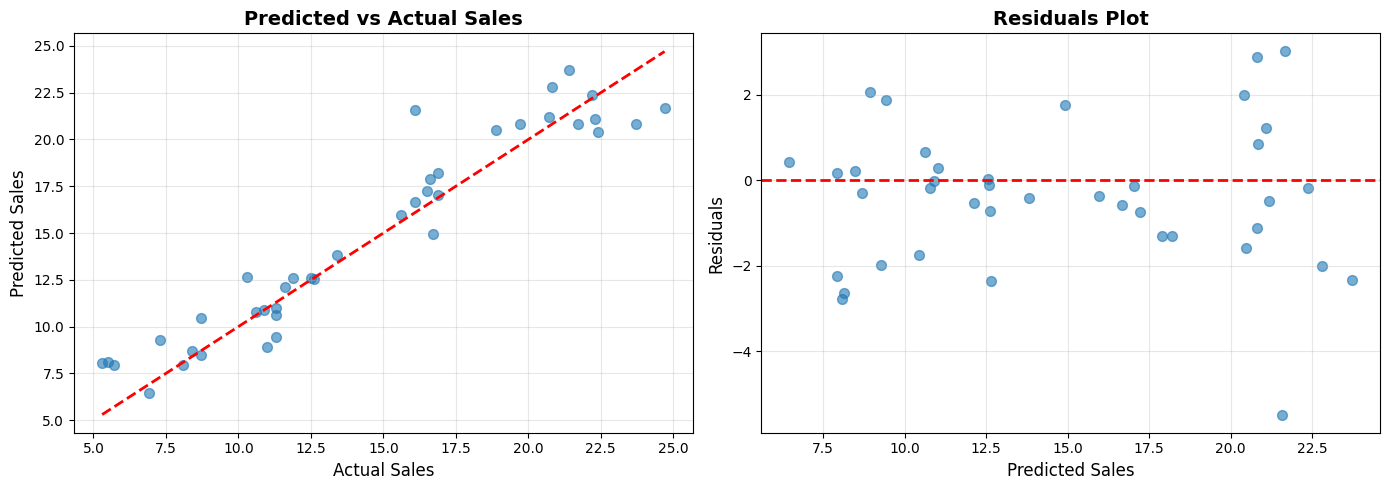

In [7]:
# Visualize predicted vs actual values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.6, s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Sales', fontsize=12)
axes[0].set_ylabel('Predicted Sales', fontsize=12)
axes[0].set_title('Predicted vs Actual Sales', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Residuals plot
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=50)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Sales', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residuals Plot', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Coefficient Interpretation

Extract and interpret the model's intercept and coefficients to understand how each advertising channel impacts sales predictions.

In [8]:
# Extract intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_
feature_names = X.columns

print("Linear Regression Equation:")
print("=" * 60)
print(f"Sales = {intercept:.4f}", end="")
for name, coef in zip(feature_names, coefficients):
    sign = "+" if coef >= 0 else "-"
    print(f" {sign} {abs(coef):.4f} × {name}", end="")
print("\n" + "=" * 60)

print("\nCoefficient Interpretation:")
print("-" * 60)
print(f"Intercept (Base Sales): {intercept:.4f} (in thousands of units)")
print("\nFeature Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"  {name:12s}: {coef:8.4f} (impact per $1000 spent)")
    interpretation = "positive" if coef > 0 else "negative"
    print(f"               → {interpretation.capitalize()} relationship with sales")
    print()

Linear Regression Equation:
Sales = 4.7141 + 0.0545 × TV + 0.1009 × Radio + 0.0043 × Newspaper

Coefficient Interpretation:
------------------------------------------------------------
Intercept (Base Sales): 4.7141 (in thousands of units)

Feature Coefficients:
  TV          :   0.0545 (impact per $1000 spent)
               → Positive relationship with sales

  Radio       :   0.1009 (impact per $1000 spent)
               → Positive relationship with sales

  Newspaper   :   0.0043 (impact per $1000 spent)
               → Positive relationship with sales



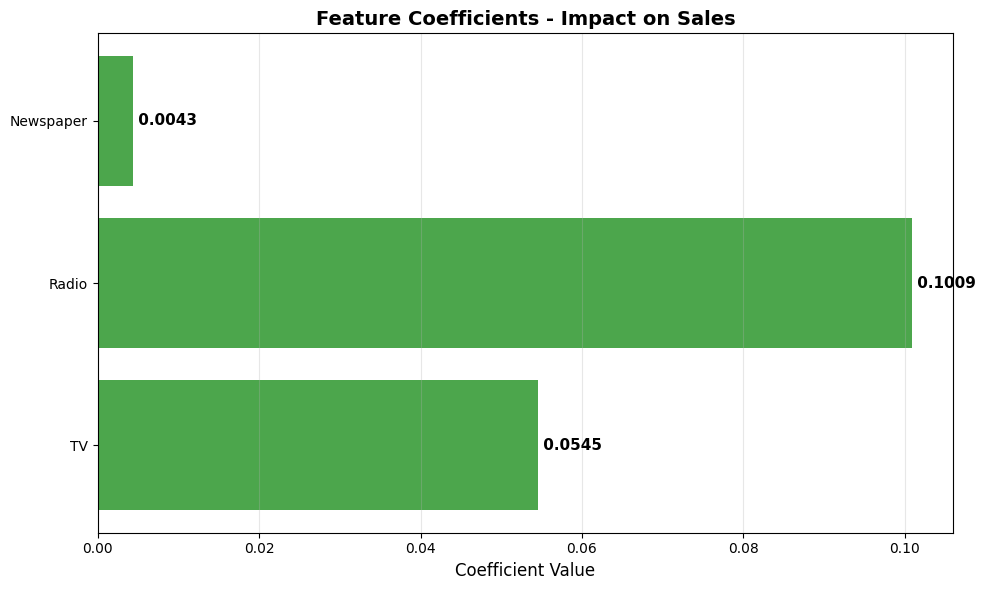


Key Insights:
------------------------------------------------------------
1. Radio: Coefficient = 0.1009
   For every additional $1000 spent on Radio, sales increase by 0.1009 units.
2. TV: Coefficient = 0.0545
   For every additional $1000 spent on TV, sales increase by 0.0545 units.
3. Newspaper: Coefficient = 0.0043
   For every additional $1000 spent on Newspaper, sales increase by 0.0043 units.


In [9]:
# Visualize coefficient importance
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['green' if coef > 0 else 'red' for coef in coefficients]
bars = ax.barh(feature_names, coefficients, color=colors, alpha=0.7)

ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Feature Coefficients - Impact on Sales', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (name, coef) in enumerate(zip(feature_names, coefficients)):
    ax.text(coef, i, f' {coef:.4f}', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("-" * 60)
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
for i, (name, coef) in enumerate(sorted_features, 1):
    print(f"{i}. {name}: Coefficient = {coef:.4f}")
    print(f"   For every additional $1000 spent on {name}, sales increase by {coef:.4f} units.")